# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import date class from datetime module
from datetime import date
# Returns the current local date
today = date.today()

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url= f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

response = requests.get(query_url + city).json()
response
# data = response.json()
# data
#print(json.dumps(data, indent=4))
    

{'coord': {'lon': 26.891, 'lat': -33.5906},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 61.25,
  'feels_like': 60.93,
  'temp_min': 61.25,
  'temp_max': 61.25,
  'pressure': 1025,
  'humidity': 82,
  'sea_level': 1025,
  'grnd_level': 1023},
 'visibility': 10000,
 'wind': {'speed': 25.37, 'deg': 253, 'gust': 37.27},
 'clouds': {'all': 46},
 'dt': 1627858048,
 'sys': {'country': 'ZA', 'sunrise': 1627880604, 'sunset': 1627918433},
 'timezone': 7200,
 'id': 964432,
 'name': 'Port Alfred',
 'cod': 200}

In [4]:
#Empty lists to append to 
city_name=[]
cloudiness_list=[]
country_list=[]
date_list=[]
humidity_list=[]
lat_list=[]
lng_list=[]
max_temp_list=[]
wind_speed_list=[]
index_count= 0
set_count= 1

#city_num = 1
print("Beginning Data Retrieval")
print("-------------------------------")

for index, city in enumerate(cities, start =1):
    try:
        response= requests.get(query_url + city).json()
        city_name.append(response['name'])
        cloudiness_list.append(response['clouds']["all"])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response["main"]['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response["main"]['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
        
        #city_found = response["name"]
        #city_num = city_num + 1
        if index_count >49:
            index_count = 1
            set_count = set_count + 1
            
        else:
            index_count = index_count + 1
            
        print(f"Processing Record {index_count} of Set {set_count} | {city}")
        
    except:
        print("City not found. Skipping... ")
        
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | denpasar
Processing Record 2 of Set 1 | high level
Processing Record 3 of Set 1 | santa maria
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | rafaela
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | formosa
Processing Record 8 of Set 1 | lasa
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | mandsaur
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | saint anthony
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | darab
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | springhill
City not found. Skipping... 
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | esperantinopolis
Processing Record 21 of Set 1 | viedma
Processing Record 22 of Set 1 | barrow
C

Processing Record 42 of Set 4 | labrea
Processing Record 43 of Set 4 | salinopolis
Processing Record 44 of Set 4 | stege
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | yumen
Processing Record 47 of Set 4 | olavarria
Processing Record 48 of Set 4 | lata
Processing Record 49 of Set 4 | ostersund
Processing Record 50 of Set 4 | zhuhai
Processing Record 1 of Set 5 | sinnamary
Processing Record 2 of Set 5 | buenos aires
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | furstenwalde
Processing Record 5 of Set 5 | namikupa
Processing Record 6 of Set 5 | shakawe
Processing Record 7 of Set 5 | haimen
Processing Record 8 of Set 5 | point pedro
Processing Record 9 of Set 5 | mahebourg
Processing Record 10 of Set 5 | nouadhibou
Processing Record 11 of Set 5 | vao
Processing Record 12 of Set 5 | muroto
Processing Record 13 of Set 5 | krasnokamensk
Processing Record 14 of Set 5 | kudahuvadhoo
Processing Record 15 of Set 5 | nishihara
Processing Record 1

Processing Record 33 of Set 8 | geraldton
Processing Record 34 of Set 8 | sosnovo-ozerskoye
City not found. Skipping... 
Processing Record 35 of Set 8 | deputatskiy
Processing Record 36 of Set 8 | wana
City not found. Skipping... 
Processing Record 37 of Set 8 | tynda
Processing Record 38 of Set 8 | bonga
Processing Record 39 of Set 8 | vicuna
Processing Record 40 of Set 8 | asau
Processing Record 41 of Set 8 | kapoeta
Processing Record 42 of Set 8 | rodrigues alves
Processing Record 43 of Set 8 | khasan
Processing Record 44 of Set 8 | piacabucu
Processing Record 45 of Set 8 | alice springs
Processing Record 46 of Set 8 | port blair
Processing Record 47 of Set 8 | presidencia roque saenz pena
Processing Record 48 of Set 8 | hasaki
Processing Record 49 of Set 8 | saint-philippe
Processing Record 50 of Set 8 | beyneu
Processing Record 1 of Set 9 | santa helena
Processing Record 2 of Set 9 | sovetskiy
Processing Record 3 of Set 9 | kinwat
Processing Record 4 of Set 9 | vardo
Processing Re

Processing Record 19 of Set 12 | pak phanang
Processing Record 20 of Set 12 | sur
Processing Record 21 of Set 12 | pasni
Processing Record 22 of Set 12 | guiratinga
Processing Record 23 of Set 12 | raudeberg
Processing Record 24 of Set 12 | pangai
Processing Record 25 of Set 12 | saint-joseph
Processing Record 26 of Set 12 | constitucion
Processing Record 27 of Set 12 | yar-sale
Processing Record 28 of Set 12 | rustenburg
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df=pd.DataFrame({
    "City":city_name,
    "Lat":lat_list,
    "Lng":lng_list,
    "Max Temp":max_temp_list,
    "Humidity":humidity_list,
    "Cloudiness":cloudiness_list,
    "Wind Speed":wind_speed_list,
    "Country":country_list,
    "Date":date_list,
})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Denpasar,-8.6500,115.2167,78.46,94,75,5.75,ID,1627857900
1,High Level,58.5169,-117.1360,89.71,37,20,2.30,CA,1627857811
2,Santa Maria,-29.6842,-53.8069,52.90,87,0,2.30,BR,1627857854
3,Saint George,37.1041,-113.5841,98.38,27,1,1.01,US,1627857827
4,Rafaela,-31.2503,-61.4867,57.00,38,0,6.55,AR,1627858049
...,...,...,...,...,...,...,...,...,...
573,Pangai,-19.8000,-174.3500,75.31,69,40,13.80,TO,1627858211
574,Saint-Joseph,-21.3667,55.6167,64.78,75,37,8.30,RE,1627858212
575,Constitución,-35.3333,-72.4167,54.05,68,0,8.61,CL,1627858212
576,Yar-Sale,66.8333,70.8333,54.81,97,100,16.06,RU,1627858212


In [6]:
weather_df.to_csv("../output_data/weather_df.csv", index=False, header=True)

In [7]:
#Looking at DataFrame to see if have 100% humidity
weather_stats_df=pd.DataFrame({
    "City":city_name,
    "Lat":lat_list,
    "Lng":lng_list,
    "Max Temp":max_temp_list,
    "Humidity":humidity_list,
    "Cloudiness":cloudiness_list,
    "Wind Speed":wind_speed_list,
    "Country":country_list,
    "Date":date_list,
})

weather_stats_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.00000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,19.004375,17.94181,69.051419,70.451557,52.392734,7.568374,1.627858e+09
std,33.235420,87.45945,13.625874,21.540625,38.652472,5.362173,9.300919e+01
min,-54.800000,-175.20000,33.730000,11.000000,0.000000,0.000000,1.627857e+09
25%,-7.869925,-58.64260,58.425000,58.000000,11.250000,3.522500,1.627858e+09
50%,21.223200,22.09895,70.055000,76.000000,53.000000,6.040000,1.627858e+09
75%,47.391675,91.96895,79.900000,86.000000,92.000000,10.360000,1.627858e+09
max,78.218600,179.31670,108.140000,100.000000,100.000000,29.930000,1.627858e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

The above Data Frame indicates that there are not any cities with over 100% humidity, skipping this section. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [24]:
#using the imported datatime to dynamically code date into title fields, below it to place it in Month,Daty,Year format
date= today.strftime("%m/%d/%Y")
date

'08/01/2021'

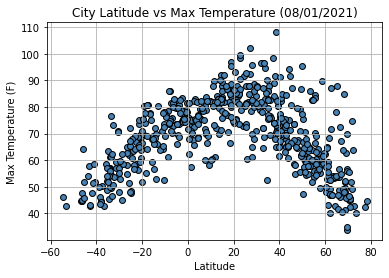

In [25]:
#weather_df.plot(kind="scatter", x= "Lat", y="Max Temp", marker="o", edgecolors="black", size="200")
plt.scatter(lat_list, max_temp_list, c ="steelblue",
            linewidths = 1,
            marker ="o", 
            edgecolor ="black", 
            s = 35)
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

The City Latitude vs Max Temperature scatter plt visually indicates that cities located closer to the equater experience higher temperatures. There plot does visually appear to have a slight concentration of higher temperatures located just above the equator. 

## Latitude vs. Humidity Plot

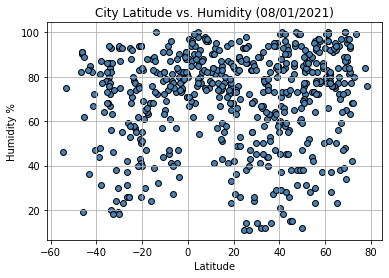

In [26]:
plt.scatter(lat_list, humidity_list, c="steelblue",
           linewidth = 1,
           marker = "o",
           edgecolor = "black",
           s = 35)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.show()

The City Latitude vs Humididty scatter plot does not appear to show a strong correlation between the level of humidity a city experiences in relation to it latitude. 

## Latitude vs. Cloudiness Plot

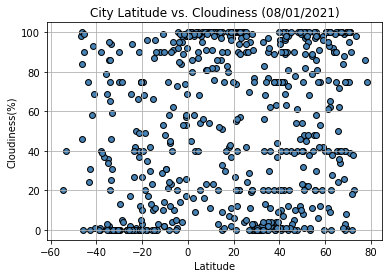

In [27]:
plt.scatter(lat_list, cloudiness_list, c="steelblue",
           linewidth= 1,
           marker = "o",
           edgecolor = "black",
           s = 35)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.show()

The City Latitude vs. Cloudiness plot does not appear to have a stron correlation but there does appear to possibly be a small cluster of cloudier cities located higher on the equator lilne. 

## Latitude vs. Wind Speed Plot

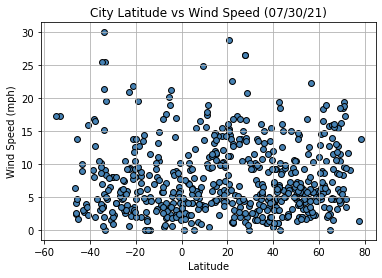

In [28]:
plt.scatter(lat_list, wind_speed_list, c="steelblue",
           linewidth= 1,
           marker = "o",
           edgecolor = "black",
           s =35)
plt.title(f"City Latitude vs Wind Speed (07/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

The City Latitude vs Wind Speed plot does not appear to have a scrong correlation either. However, there do appear to be a few more data points further from the equator with a higher wind speed indicating that it is possible that locations further from the euqator experience more wind. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [29]:
north= weather_df.loc[weather_df['Lat'] >=0]
south= weather_df.loc[weather_df['Lat'] <=0]

In [30]:
def regressline(x_values, y_values, ylabel, text_cord):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    #plot scatter plot
    plt.scatter(x_values, y_values)
    #plot regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_cord , fontsize =15, color="red")
    #label plot
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    #print r square value
    print(f"The r-value is: {rvalue**2}")

    #show plot
    plt.show()

 #### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3782436718962375


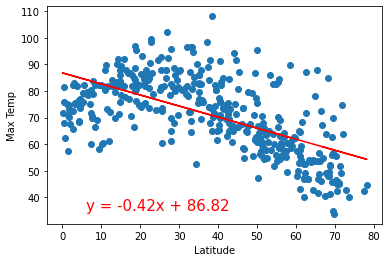

In [41]:
x_values= north["Lat"].astype('float')
y_values= north["Max Temp"].astype('float')
regressline(x_values, y_values, "Max Temp", (6,35))

There appears to be a statistically significant correlation between between maximum temperature and latitude, with the graph displaying a negative r value indicating that the further from the equator while in the northern hemisphere the lower the maximium temperature reached. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6513295637735247


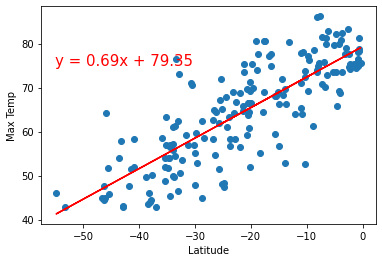

In [40]:
x_values= south["Lat"].astype('float')
y_values= south["Max Temp"].astype('float')
regressline(x_values, y_values, "Max Temp", (-55,75))

The southern hemisphere regression line has a slightly stronger correlation than the norther, and indicates with positive r value that the closer to the to the equator a city is the higher max temperature that is reached for the city. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0006849707875586603


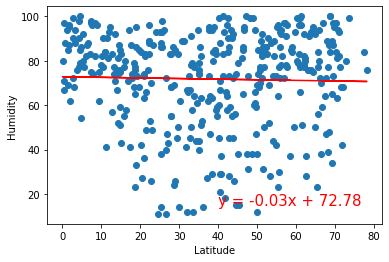

In [33]:
x_values= north["Lat"].astype('float')
y_values= north["Humidity"].astype('float')
regressline(x_values, y_values, "Humidity", (40,15))

The Norther Hemisphere  Humidity vs Latitude Linear Regression plot has a failry flat r-value, indicating that there does not appear to be a significant correlation between humidity and latitude for a city. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01492324082046709


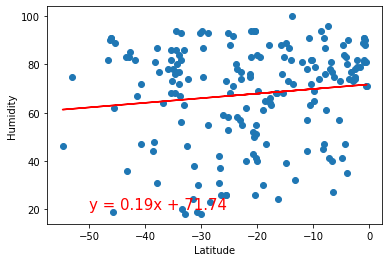

In [34]:
x_values= south["Lat"].astype('float')
y_values= south["Humidity"].astype('float')
regressline(x_values, y_values, "Humidity", (-50,20))

The Southern Hemisphere Humidity vs Latitude Linear Regression plot has a very weak correlation, indicating that there does not appear to be a significant correlation between humidity and latitude for a Southern Hemisphere city. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006542073663436661


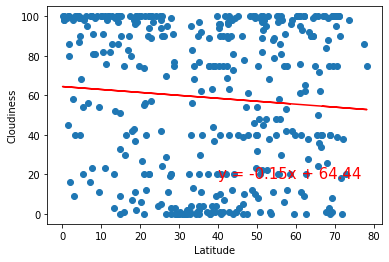

In [43]:
x_values= north["Lat"].astype('float')
y_values= north["Cloudiness"].astype('float')
regressline(x_values, y_values, "Cloudiness", (40,18))

The N. Hemisphere Cloudiness vs Latitude plot once again is showing a very weak negative correlation. Indicating that there is not much of a significance between a cities latitude in the Northern Hemisphere vs its cloudiness. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02062698589112116


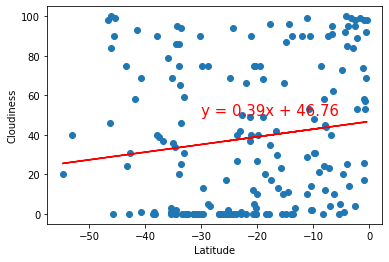

In [38]:
x_values= south["Lat"].astype('float')
y_values= south["Cloudiness"].astype('float')
regressline(x_values, y_values, "Cloudiness", (-30,50))

The Southern Hemisphere Cloudiness vs Latitude Linear Regression shows that there appears to be a possilbe correlation 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0005890937863042573


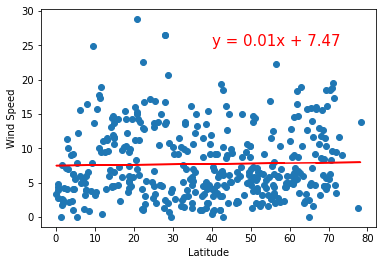

In [36]:
x_values= north["Lat"].astype('float')
y_values= north["Wind Speed"].astype('float')
regressline(x_values, y_values, "Wind Speed", (40,25))

The above plot and regression line shows a weak negative correlation between wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01039949420355942


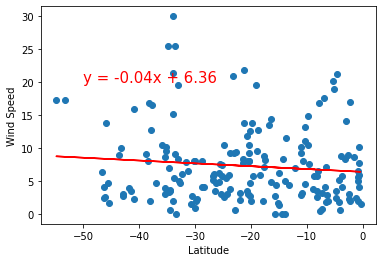

In [37]:
x_values= south["Lat"].astype('float')
y_values= south["Wind Speed"].astype('float')
regressline(x_values, y_values, "Wind Speed", (-50,20))

The above plot and regression line shows a weak negative correlation between wind speed and latitude.